# Titanic Survival Prediction

## Importation

This is the part where we will be importing the libraries we will be using, as well as our dataset

### Libraries


In [1]:
# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn.preprocessing as skpp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [2]:
# Loading the data from .csv to Pandas DataFrame

data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

This is where we will clean our data, are there any missing values? Duplicates? Maybe it is formatted in a way we can't use so we will have to adjust it?

In [3]:
# We use ".shape" to further understand the dataset, here we can see that it has 891 records (rows) while having 12 fields (collumns)

data.shape

(891, 12)

We can also see whether or not theres something missing here. There are 714 counts in age, but there are consistent 891 counts in other collums? What does it mean? It means that this field, Age, has some null values in it which we should find a way to "fix" later to "complete" the dataset in the age field

In [4]:
# Getting even more information about our data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We used .info to further confirm that there are indeed missing data in the Age field and through this we also now notticed that there are some disrepensies in the Cabin and Embarked field also, they are not equal to our highest count which is 891.

Keep in mind though that this is fine, assuming that we won't be using the fields with missing values, if we are to use them, then later on we will have to find a way to "fix" it in a reasonable manner

In [5]:
# Another way to check the number of missing values in each fields is this
# This command will give us the count of all missing values

data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# To see if we have duplicate records

data.duplicated().sum()

0

In [7]:
# Too many null values in the Cabin field, we won't be able to use this much therefore we will remove it

data = data.drop(columns='Cabin', axis=1)

In [8]:
# To check if we really did drop the field correctly

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now, I want to keep the Age field and not drop it, but because there are so many null values in it I can not really ignore it?

In [9]:
# What I will do is simply add the median in the missing records to fill in the gap

data['Age'].fillna(data['Age'].median(), inplace=True)

In [10]:
# Lets confirm what we did worked
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Bam! No more missing values for Age and Cabin is gone

There is still for Embarked though



To fill up our 2 remaining null values in Embarked, instead of the average like the Age

I will simply replace it with the mode (The value that appeared most) considering that there are only two values for Embarked so this should be fine. It would be a waste to just drop those two records just because their Embarked is not there

In [11]:
# Getting the mode value for "Embarked"

print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [12]:
# The result is S so we will replace the missing values with this

data['Embarked'].fillna('S', inplace=True)

In [13]:
# Lets confirm what we did worked
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Ok good, we no longer have any missing values, no duplicates, and no weird formats therefore we have succeeded in cleaning our data set

## Data Analysis

This part we will just try to analyze more information from what we can see in our cleaned dataset, usually mathematical in nature

In [14]:
# Just to see our dataset once again so we won't have to scroll back up as much if we needed to see it again

data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [15]:
# To see the statistical measurements for ou data again, now that it has been cleaned now
# Only the numerical data will be seen here
# Another caviat is that this is not useful for categorical numerical data such as Suvived, Pclass, Sex for example.
# The data we have that will benefit from being described will be continuous numerical data like Age and Fare

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Shows how much records and fields we have (Records, Fields)

data.shape

(891, 11)

**Observations**



---



*    **Dataset** - 891 passengers, 11 features.
*    **Numerics** - Average age ~29.7, fares 0-512.3 (potential outliers), average siblings/spouses ~0.52, average parents/children ~0.38.

Reasoning:

*    **data.shape**: Provides dataset dimensions (observations, features).
*     **data.describe()**: Shows summary statistics (mean, min, max, etc.) for numerical features, highlighting potential outliers and distributions.


What we will use here is Pclass, Sex, and Age to predict whether or not someone will survive, so we will be focusing on those

## Data Visualization

This is the part where we will visualize our data and try to gain more insight and understanding in them

### Survived

In [17]:
# Lets take a look at how much people actually survived and didn't survive overall

data['Survived'].value_counts()

,count
Survived,
0,549
1,342


0 = Died
1 = Survived

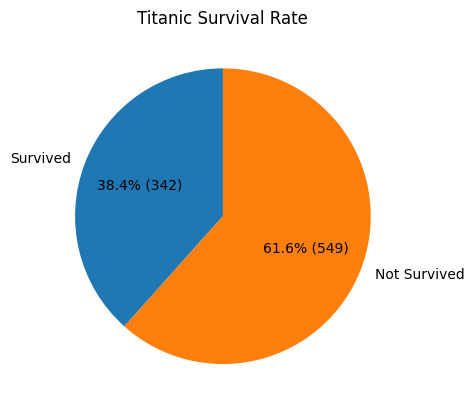

In [18]:
labels = ['Survived', 'Not Survived']
sizes = [342, 549]
plt.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(sizes) / 100), startangle=90)
plt.title('Titanic Survival Rate')
plt.show()

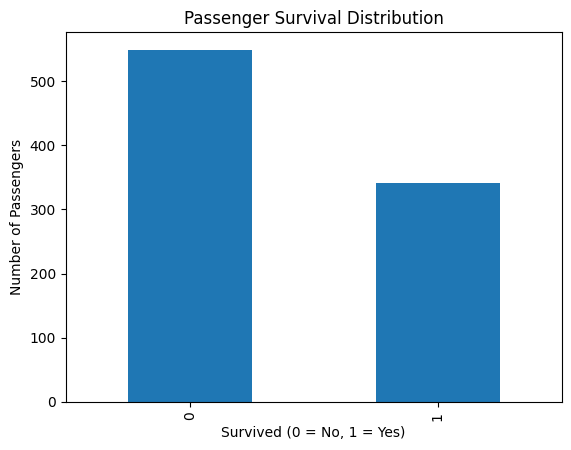

In [19]:
# Another way we can visualize our data is by countplots

survived_counts = data['Survived'].value_counts()
survived_counts.plot(kind='bar',
                     xlabel='Survived (0 = No, 1 = Yes)',
                     ylabel='Number of Passengers',
                     title='Passenger Survival Distribution')
plt.show()

**Survived Observations**


---


The visualization reveals a low overall survival rate of 38.4% in the Titanic disaster. A majority of passengers (549) did not survive, compared to 342 who did. This stark difference highlights the need to investigate factors that might have increased the chances of survival.

<br>

**Reasoning**

---

The pie chart visually represents the proportion of survivors and non-survivors.

The 38.4% survival rate is calculated from the number of survivors out of the total passenger count.

Further analysis is necessary to pinpoint specific factors influencing survival, as the overall rate alone is not enough.


Now, this is for overall / sum of everyone in the tragedy, what other information / categories could we use to further understand the accident?

Mmmm from what I see right now, we should figure out the Pclass, sex, and age

Lets start with Pclass

### Passenger Class

In [20]:
# To see how many people there were each class
data['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


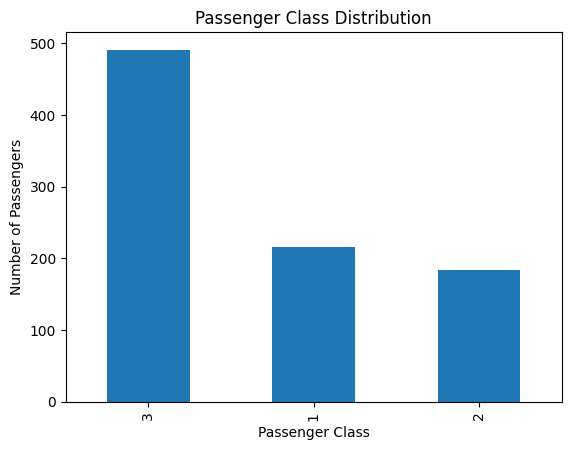

In [21]:
# Same as above but in a more visual expressive way
passenger_class_counts = data['Pclass'].value_counts()
passenger_class_counts.plot(kind='bar',
                            xlabel='Passenger Class',
                            ylabel='Number of Passengers',
                            title='Passenger Class Distribution')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

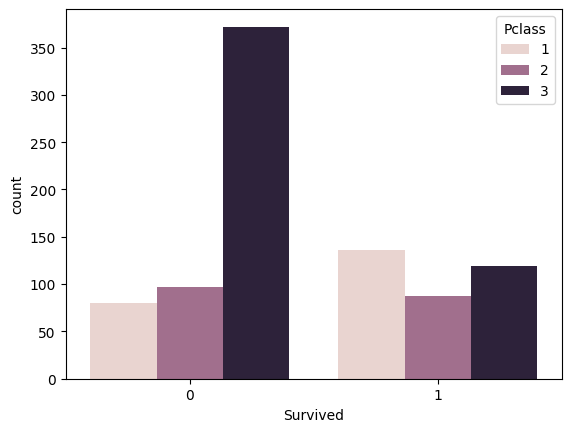

In [22]:
# Lets see now how many survived and didn't per passenger class
sns.countplot(x=data['Survived'], hue=data['Pclass'])

**Passenger Class Observations:**


---



**Unequal Distribution and Survival**: - Passenger class was unequally distributed and strongly correlated with survival rates.

**3rd Class** - Most passengers traveled in 3rd class, but they had the lowest survival rate.

**1st Class** - Fewer passengers were in 1st class, and they had the highest survival rate.

**2nd Class** - This class fell between the extremes of 1st and 3rd class in both passenger numbers and survival.

**Class Division** - A stark class division existed on the Titanic, impacting both demographics and survival outcomes.


<br>

**Reasoning:**


---


**Socio-economic Factors** - Ticket prices and accommodations varied greatly between classes, reflecting socio-economic disparities and influencing passenger distribution.

**Prioritization and Access** - Higher-class passengers likely had prioritized evacuation, better cabin locations for lifeboat access, and potentially better access to information and resources.

**Ship Design and Location** - The ship's layout, with 3rd class cabins on lower decks, hindered escape for those passengers.

**Language and Familiarity** - Language barriers and unfamiliarity with the ship might have disproportionately affected 3rd class passengers


### Sex

Lets move on to the sex now, does it matter in predicting the survival rates?

In [23]:
# Lets see the amount per sex
data['Sex'].value_counts()

,count
Sex,
male,577
female,314


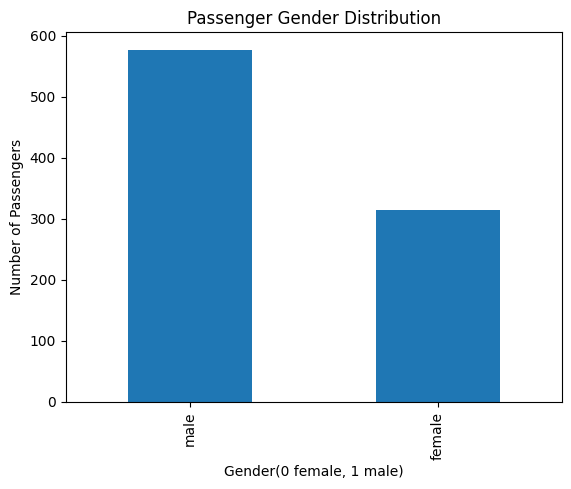

In [24]:
# Countplot for Sex

Sex_counts = data['Sex'].value_counts()
Sex_counts.plot(kind='bar',
                xlabel='Gender(0 female, 1 male)',
                ylabel='Number of Passengers',
                title='Passenger Gender Distribution')
plt.show()

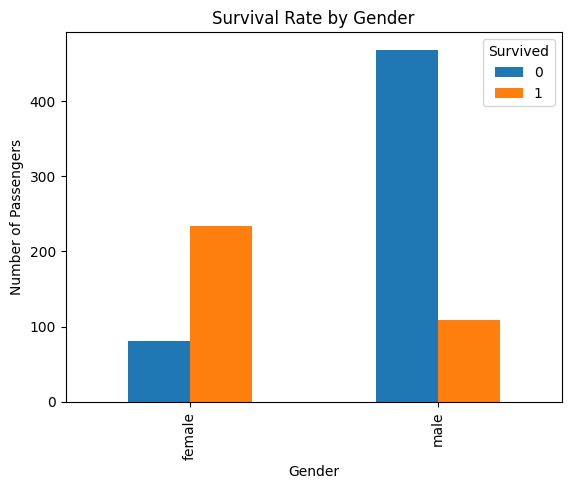

In [25]:
pd.crosstab(data['Sex'], data['Survived'])

pd.crosstab(data['Sex'], data['Survived']).plot(kind='bar',
                                               title='Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

Lets also transform our gender field to a numeric one so we will have an easier time and that it is expressed numerically, an important aspect needed when handling data

*   0 for female
*   1 for male



In [26]:
# Code to change the values

data['Sex'].unique()

sex_values = np.array(['male', 'female'], dtype=object)

le = skpp.LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [27]:
# Lets see if it actually changed

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


We see here that you are more likely to survive as a female than as a male, the most common idea to it from my understanding is from the chivalry of men back in the day, ready to lay their life down for women, children, and the elderly back in the days

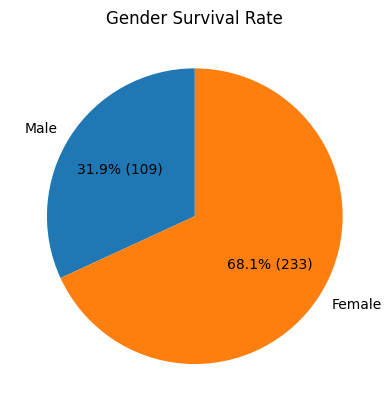

In [28]:
# Filter data for survived males and females
male_survived = data[(data['Sex'] == 1) & (data['Survived'] == 1)].shape[0]
female_survived = data[(data['Sex'] == 0) & (data['Survived'] == 1)].shape[0]

labels = ['Male', 'Female']
sizes = [male_survived, female_survived]

plt.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(sizes) / 100), startangle=90)
plt.title('Gender Survival Rate')

plt.show()

This is the summary of how many survived for male and female

**Sex Observations**


---


**Survival Rate by Sex** - There was a significant difference in survival rates between males and females.
   
**Females** - Females had a much higher survival rate compared to males.
    
**Males** - Males had a much lower survival rate.
    
**"Women and Children First" Policy** - The observations align with the historical accounts of the "women and children first" protocol followed during the evacuation.

<br>

**Reasoning**:


---


**Prioritization of Women and Children** - The "women and children first" protocol prioritized the evacuation of women and children into lifeboats, leading to a higher survival rate for females.

**Societal Norms** - Societal norms and expectations of the time likely played a role in prioritizing women and children's safety.

**Limited Lifeboat Capacity** - The limited number of lifeboats further emphasized the need for prioritization, and this prioritization favored women and children.

**Societal Roles** - Men were expected to be the protectors and to give up their spots on the lifeboats to women and children.


### Age

Now lets see age

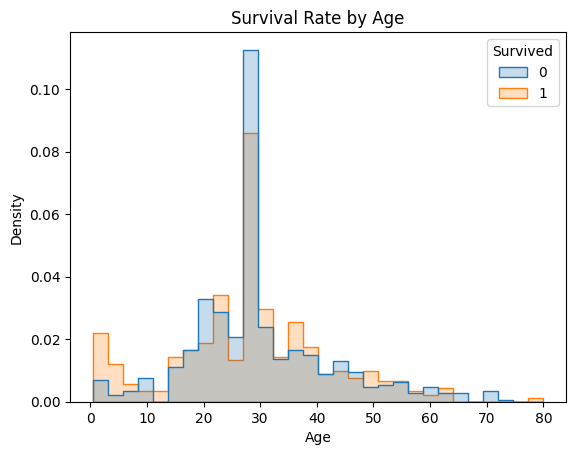

In [29]:
sns.histplot(data=data, x='Age', hue='Survived', element='step', stat='density', common_norm=False)

plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

**Age Observations**


---

The age histogram reveals a complex relationship with survival on the Titanic. Younger passengers, especially children, had higher survival rates, likely due to rescue prioritization.

Survival chances decreased with increasing age, with a dip for young adults, then a slight improvement for older adults, though this observation is based on a smaller sample.

<br>

**Reasoning**


---


Younger age generally increased the odds of survival, but variations existed within different age groups due to a complex interplay of prioritization, vulnerability, and individual resources.

## Machine Learning

This is the start of where we will be building our prediction model

### Model Training

For our data modelling, we will only be needing our Sex, Pclass, and Survived fields. This is what I will base my survival prediction on <br><br> We will also be using LogisticRegression

In [30]:
# Feature Selection / What fields we will use for our model
X = data[['Sex', 'Pclass', 'Age']]
y = data['Survived']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Training
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Model Prediction

In [31]:
pred = print(log.predict(X_test))

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


To check if what we put is correct, we compare the numbers of x_test to y_test

In [32]:
print(y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [34]:
# To see if a specific person can survive by our model we can do this
# Though keep in mind we can only check it by a persons Pclass, Sex, and Age
# res = log.predict([[Pclass, Sex, Age]])

res = log.predict([[3, 0, 26]]) # We change the values here, if we want to test for a specific something

if res == 0:
    print("Survived")
else:
    print("Not Survived")

Survived


### Model Testing

To test the accuracy of our model we will be using the accuracy_score and confusio_matrix

In [35]:
# Accuracy Score

y_pred = log.predict(X_test)  # Get predictions for the test data
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

print(f"Accuracy: {accuracy}")

Accuracy: 0.8100558659217877


The model I created has a 81.01% chance of being correct when predicting whether or not a person will survive the titanic based solely on the sex and passenger class

In [36]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[94 16]
 [18 51]]


**Testing Observations**


---

**Accuracy** - The model achieves an accuracy of 81.01%, which is a good starting point. This means it correctly predicts the survival outcome for approximately 81% of the passengers in the test dataset.

**Confusion Matrix** - The confusion matrix provides a more detailed breakdown of the model's performance.
*     True Negatives (TN): 94 passengers were correctly predicted as not surviving.
*     False Positives (FP): 16 passengers were incorrectly predicted as surviving when they actually did not.
*     False Negatives (FN): 18 passengers were incorrectly predicted as not surviving when they actually did.
*     True Positives (TP): 51 passengers were correctly predicted as surviving.\  

## Conclusion



This project aimed to develop a model for predicting Titanic passenger survival based on features such as passenger class, sex, and age. The analysis revealed a strong correlation between these features and survival outcomes, allowing the model to accurately predict survival probabilities.

Furthermore, the model demonstrates good overall accuracy and reliability, with an accuracy score of approximately 81%. This indicates that the model correctly predicts the survival outcome for a significant portion of the passengers. Evaluation using a confusion matrix further supports the model's performance, revealing its strengths and weaknesses in classifying survivors and non-survivors.



**The model effectively predicts Titanic passenger survival based on key factors like passenger class, sex, and age, achieving ~81% accuracy.**